# Load and display dataframe of postcodes

In [1]:
import pandas as pd
import pickle

In [2]:
# load dataframe of postcodes
# satisfying the distance requirements
pc_file = open('pc.p', 'rb')
pc = pickle.load(pc_file)
pc_file.close()
pc.shape

(4, 4)

In [3]:
# display dataframe
pc

,latitude,longitude,EX1,TA1
postcode,,,,
EX14,50.81272,-3.18960,27.0,29.0
EX15,50.87675,-3.33907,27.0,33.0
EX16,50.92258,-3.49122,30.0,28.0
TA21,50.97673,-3.24507,33.0,15.0


In [4]:
# now work with that, e.g. sort by column, pick the postcode that minimises some metric etc ...


# Visualisation with Geopandas

The following visualisation may require more packages (geopandas packages are not included in the requirements file; this was done with version 0.4.1) and it also requires the shapefiles under 'UK postcode boundary polygons' on the page https://www.opendoorlogistics.com/downloads/

In [5]:
# import geopandas packages, load search parameters
import geopandas
from shapely.geometry import Point
import matplotlib.pyplot as plt
sp_file = open('search_parameters.py', 'r')
exec(sp_file.read())
sp_file.close()

In [6]:
# geopandas dataframes for the plot
# (1) postcode centres for labels
temp_df = pc.reindex(columns=['latitude','longitude','coordinates'])
temp_df['coordinates'] = list(zip(temp_df.longitude, temp_df.latitude))
temp_df['coordinates'] = temp_df['coordinates'].apply(Point)
pc_centres = geopandas.GeoDataFrame(temp_df, geometry='coordinates')

In [7]:
# (2) destination coordinates
cols = list(pc.columns)
cols.remove('longitude')
cols.remove('latitude')
temp_df = pd.read_csv('postcode-outcodes.csv',
                     index_col='postcode', header=0).drop(columns=['id']).reindex(index=cols)
temp_df['coordinates'] = list(zip(temp_df.longitude, temp_df.latitude))
temp_df['coordinates'] = temp_df['coordinates'].apply(Point)
dest_coords = geopandas.GeoDataFrame(temp_df, geometry='coordinates')

In [8]:
# (3) axis limits, background map
minlat = min(temp_df.latitude.min(), min_lat)
maxlat = max(temp_df.latitude.max(), max_lat)
minlon = min(temp_df.longitude.min(), min_lon)
maxlon = max(temp_df.longitude.max(), max_lon)
del temp_df
uk = geopandas.read_file('postcode_shapes/Distribution/Areas.shp')

In [9]:
# (4) shapefile for postcode districts
pc_shapes = geopandas.read_file('postcode_shapes/Distribution/Districts.shp')\
    .rename(columns={'name': 'postcode'}).set_index('postcode')
pc_shapes = pc_shapes.reindex(index=pc.index)

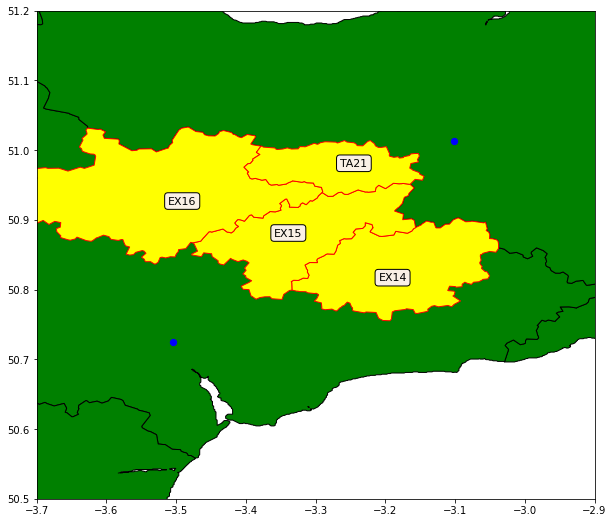

In [10]:
# now plot everything
fig, axs = plt.subplots(1, figsize=(10,10))
uk.plot(ax=axs, color='green', edgecolor='black')
pc_shapes.plot(ax=axs, color='yellow', edgecolor='red')
props = dict(boxstyle='round', facecolor='linen', alpha=1)
for p in pc_centres.iterrows():
    axs.text(p[1]['longitude'], p[1]['latitude'], p[0],
             horizontalalignment='center', fontsize=11, bbox=props)
dest_coords.plot(ax=axs, color='blue', markersize=40)
axs.set_xlim(([minlon-0.1, maxlon+0.1]))
axs.set_ylim(([minlat-0.1, maxlat+0.1]))
plt.show()